In [1]:
import pickle
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib
matplotlib.set_loglevel('error')
plt.rcParams['font.family'] = 'sans-serif'  # Change to a valid font family

# Get the path of the current script (or current working directory)
parent_dir = os.path.dirname(os.getcwd())
# Append the parent directory to sys.path
sys.path.append(parent_dir)

import src
from src.PrePipelineSteps import Pycromanager2NativeDataType, Make_Output_Dir_JF, Make_Analysis_Dir_JF, \
                                    ConsolidateImageShapes, TrimZSlices, AutomaticSpotDetection_JF

from src.PipelineSteps import CellSegmentationStepClass_JF, BIGFISH_SpotDetection, SimpleCellposeSegmentaion, ParamOptimizer_BIGFISH_SpotDetection, \
                                TrackPy_SpotDetection

from src.PostPipelineSteps import BuildPDFReport, SaveSpotDetectionResults, SaveMasksToAnalysis, SendAnalysisToNAS, \
                                    DeleteTempFiles, TrackPyAnlaysis

                            

from src import Experiment, PipelineSettings, ScopeClass, PipelineDataClass, Pipeline

from pycromanager import Dataset

def save_dict_to_file(dic, location):
    f = open(location,'w')
    f.write(str(dic))
    f.close()

In [2]:
ds = Dataset(r'\\munsky-nas.engr.colostate.edu\share\RNA_diffusion_data\03052024_H128_IntronDiffusion\H128FastVids_5ms_0ND_green_40mw_5')
# ds = Dataset(r"C:\Users\Jack\Desktop\H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_2")

Dataset opened                 


In [3]:
kwargs = {'nucChannel': [0], 'FISHChannel': [0],
          'user_select_number_of_images_to_run': 1000, 

          # bigfish parameters
          'voxel_size_yx': 130,
          'voxel_size_z': 500,
          'spot_yx': 330, 
          'spot_z': 500, 
          'bigfish_alpha': 0.97, 
          'bigfish_beta': 4, 
          'bigfish_gamma': 7, 
          'use_log_hook': False,
          'MIN_NUM_SPOT_FOR_CLUSTER': 4,
          'CLUSTER_RADIUS': 800,

          # trackpy parameters
          'timestep_s': (5+20) * 1e-3, # convert ms to s
          'analysis_location': None,
          'trackpy_minmass': 300,
          'sub_pixel_fitting': False,
          'trackpy_max_lagtime': 200,
          'link_search_range': [0.05]
          }


In [4]:
compiler = src.SingleStepCompiler(ds, kwargs)

In [5]:
compiler.kwargs['display_plots'] = False
output = compiler.sudo_run_step(BIGFISH_SpotDetection)


========================== Running cell 0 ==========================
detected canidate spots
 shape: (248, 2)
 threshold: None
detected spots after decomposition
 shape: (257, 2)
detected spots after clustering
 shape: (257, 3)
detected clusters
 shape: (1, 4)
========================== Running cell 1 ==========================
detected canidate spots
 shape: (283, 2)
 threshold: None
detected spots after decomposition
 shape: (293, 2)
detected spots after clustering
 shape: (293, 3)
detected clusters
 shape: (1, 4)
========================== Running cell 2 ==========================
detected canidate spots
 shape: (280, 2)
 threshold: None
detected spots after decomposition
 shape: (311, 2)
detected spots after clustering
 shape: (311, 3)
detected clusters
 shape: (2, 4)
========================== Running cell 3 ==========================
detected canidate spots
 shape: (260, 2)
 threshold: None
detected spots after decomposition
 shape: (268, 2)
detected spots after clustering
 shape

In [6]:
compiler.kwargs = {**compiler.kwargs, **output.__dict__}
compiler.kwargs['display_plots'] = True
compiler.kwargs['df_spotresults'].head()


y_px  x_px  cluster_index  timepoint  fov  FISH_Channel
0    37   263             -1          0    0             0
1    53   276             -1          0    0             0
2    56   286             -1          0    0             0
3    57   260             -1          0    0             0
4    57   337             -1          0    0             0

Frame 199: 277 trajectories present.


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\miniconda3\\envs\\ImgProcessing_env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(F

lagt
0.025    0.016195
0.050    0.020041
0.075    0.025173
0.100    0.026540
0.125    0.031173
           ...   
4.875    0.024950
4.900    0.026061
4.925    0.025367
4.950    0.008471
4.975    0.016900
Name: msd, Length: 199, dtype: float64
     y_px  x_px  cluster_index  timepoint  fov  FISH_Channel    xnm    ynm  \
0      37   263             -1          0    0             0  34190   4810   
163   346   167             -1          0    0             0  21710  44980   
164   346   301             -1          0    0             0  39130  44980   
165   347   176             -1          0    0             0  22880  45110   
166   348   139             -1          0    0             0  18070  45240   
..    ...   ...            ...        ...  ...           ...    ...    ...   
89    301   200             -1        199    0             0  26000  39130   
88    299   306             -1        199    0             0  39780  38870   
87    299   296             -1        199    0          

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAHVIT.TTF', name='Franklin Gothic Heavy', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\YuGothR.ttc', name='Yu Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\PALSCRI.TTF', name='Palace Script MT', style='normal', variant='normal', weigh

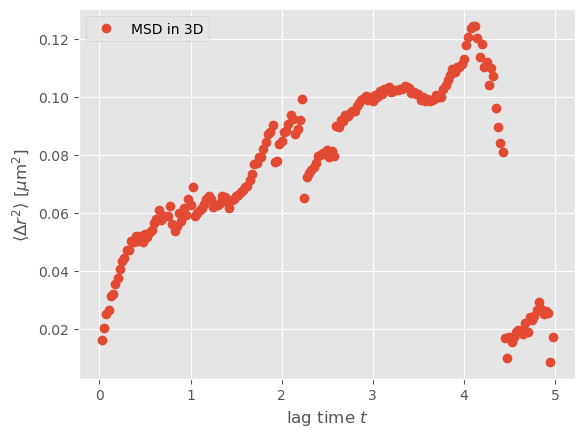

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
DEBUG:matplotlib.animation:frame size in pixels is 640 x 480
DEBUG:matplotlib.animation:frame size in pixels is 640 x 480
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 2.0 -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation_track_particle0.mp4
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 2.0 -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation_track_particle0.mp4
DEBUG:matplotlib.animation:MovieWriter stderr:
ffmpeg version 6.1.1-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=p

KeyError: 'img_id'

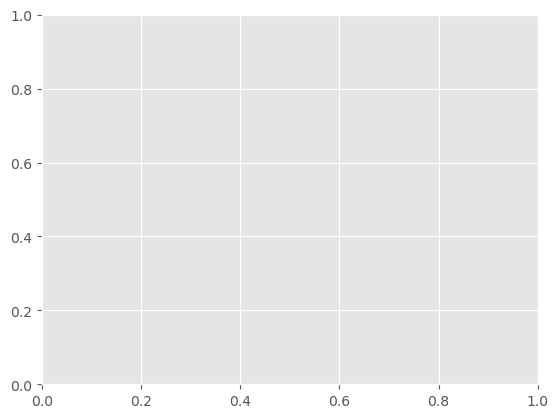

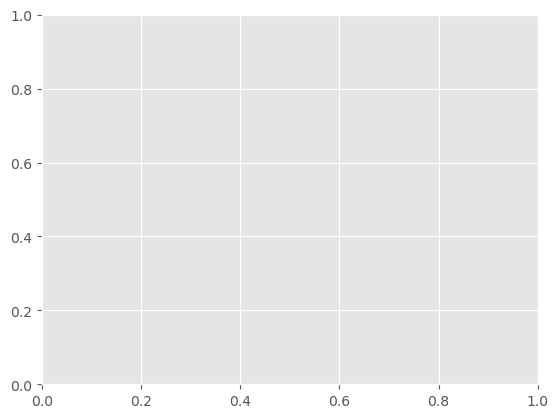

In [7]:
output = compiler.sudo_run_step(TrackPyAnlaysis)